# Countries Explorative Data Analysis (EDA)

In [20]:
import csv
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import requests
import seaborn as sns
import time

## Overview
The data contains information about 186 countries.
The data can help analyze the population, area, and different details about the countries

## Questions for Analysis
1. What is the population distribution?
2. What is the most and least populated country?
3. What is the most and least populated continent?
4. What is the country with the largest and smallest average area?
5. What is the continent with the largest and smallest average area?
6. What is the country with the most inequality of wealth?
7. What is the continent with the most/least equality of wealth?
8. What is the most spoken language in the world?
9. How many countries drive on the left side?
10. How many countries are still not independant?
11. What is the continent with the most countries?
12. What country got his independence last?

## About Dataset

The dataset contains information about all the 250 delegations in the world. The datasetcomes from two different APIs and websites
- REST Countries API
- Restful Countries API

### Columns description
- ```a```
- b
- c
- d
- e

## Data Collection

### Create CSV file from first API

In [26]:
# Handle ChunkedEncodingError by adding 'try except' and adding 1 second pause between each attempt
for attempt in range(5):
    country_list = []
    
    try:
        response = requests.get('https://restcountries.com/v3.1/all')
        
        if response.status_code != 200:
            print('Failed to find data')

        countriesJson = json.loads(response.content)

        # Collect relevant columns
        for item in countriesJson:
            keys = item.keys()
            country = {
                'name': item['name']['common'],
                'cca3': item['cca3'],
                'continent' : item['continents'][0],
                'area': item['area'],
                'car_side': item['car']['side'],
                'population': item['population'],
                'gini': list(item['gini'].values())[0] if 'gini' in keys else None,
                'languages': ', '.join(list(item['languages'].values())) if 'languages' in keys else None
            }
            country_list.append(country)

        header = country_list[0].keys()

        # Create/replace CSV file
        with open('Data/countries1.csv', 'w', newline='') as output_file:
            dict_writer = csv.DictWriter(output_file, header)
            dict_writer.writeheader()
            dict_writer.writerows(country_list)
            output_file.close()
            print('CSV file', output_file.name, 'created')
    
        break
    except requests.exceptions.ChunkedEncodingError:
        time.sleep(1)
else:
    print('Failed to fetch data from REST countries API')

CSV file Data/countries1.csv created


### Create CSV file from second API

In [28]:
# Request data
api_key = '1787|qM666AtNiFBX3PjiuCjngNuBXh9VyRdggx94r1Hr'
url = 'https://restfulcountries.com/api/v1/countries'
headers = {'Accept': 'application/json', 'Authorization': 'Bearer' + ' ' + api_key}
                                
try:
    country_list2 = []
    response = requests.get(url, headers=headers)
    
    if response.status_code != 200:
        print('Failed to find data')
    
    countries2Json = json.loads(response.content)['data']
    
    # Collect relevant columns
    for item in countries2Json:
        country = {
            'name': item['name'],
            'iso3': item['iso3'],
            'capital': item['capital'],
            'currency': item['currency']
        }
        country_list2.append(country)
    
    header = country_list2[0].keys()
    
    # Create/replace CSV file
    with open('Data/countries2.csv', 'w', newline='') as output_file:
        dict_writer = csv.DictWriter(output_file, header)
        dict_writer.writeheader()
        dict_writer.writerows(country_list2)
        output_file.close()
        print('CSV file', output_file.name, 'created')
        
except:
    print('Failed to fetch data from Restful Countries API')

CSV file Data/countries2.csv created


### Create dataframe from 2 CSV files

In [30]:
# Get number of rows/columns of each dataframe
countries1 = pd.read_csv('Data/countries1.csv')
print('Countries 1 shape:', countries1.shape)

countries2 = pd.read_csv('Data/countries2.csv')
print('Countries 2 shape:', countries2.shape)

Countries 1 shape: (250, 8)
Countries 2 shape: (186, 4)


In [31]:
# Merge dataframes
countries = countries1.merge(right=countries2, how='inner', left_on='cca3', right_on='iso3')
print('Merged dataframe shape:', countries.shape)

Merged dataframe shape: (186, 12)


## Data Exploration

In [33]:
countries.head()

,name_x,cca3,continent,area,car_side,population,gini,languages,name_y,iso3,capital,currency
0,Grenada,GRD,North America,344.0,left,112519,NaN,English,Grenada,GRD,St. George's,XCD
1,Switzerland,CHE,Europe,41284.0,right,8654622,33.1,"French, Swiss German, Italian, Romansh",Switzerland,CHE,Berne,CHF
2,Sierra Leone,SLE,Africa,71740.0,right,7976985,35.7,English,Sierra Leone,SLE,Freetown,SLL
3,Hungary,HUN,Europe,93028.0,right,9749763,29.6,Hungarian,Hungary,HUN,Budapest,HUF
4,Taiwan,TWN,Asia,36193.0,right,23503349,NaN,Chinese,Taiwan,TWN,Taipei,TWD


In [34]:
countries.tail()

,name_x,cca3,continent,area,car_side,population,gini,languages,name_y,iso3,capital,currency
181,Republic of the Congo,COG,Africa,342000.0,right,5657000,48.9,"French, Kikongo, Lingala",Congo,COG,Brazzaville,XAF
182,Belgium,BEL,Europe,30528.0,right,11555997,27.2,"German, French, Dutch",Belgium,BEL,Brussels,EUR
183,Israel,ISR,Asia,20770.0,right,9216900,39.0,"Arabic, Hebrew",Israel,ISR,Jerusalem,ILS
184,New Zealand,NZL,Oceania,270467.0,left,5084300,NaN,"English, Māori, New Zealand Sign Language",New Zealand,NZL,Wellington,NZD
185,Nicaragua,NIC,North America,130373.0,right,6624554,46.2,Spanish,Nicaragua,NIC,Managua,NIO


In [35]:
countries.sample(5)

,name_x,cca3,continent,area,car_side,population,gini,languages,name_y,iso3,capital,currency
45,Sudan,SDN,Africa,1886068.0,right,43849269,34.2,"Arabic, English",Sudan,SDN,Khartoum,SDG
117,Estonia,EST,Europe,45227.0,right,1331057,30.3,Estonian,Estonia,EST,Tallinn,EUR
21,Yemen,YEM,Asia,527968.0,right,29825968,36.7,Arabic,Yemen,YEM,Sanaa,YER
182,Belgium,BEL,Europe,30528.0,right,11555997,27.2,"German, French, Dutch",Belgium,BEL,Brussels,EUR
56,Qatar,QAT,Asia,11586.0,right,2881060,NaN,Arabic,Qatar,QAT,Doha,QAR


In [36]:
countries.dtypes

name_x         object
cca3           object
continent      object
area          float64
car_side       object
population      int64
gini          float64
languages      object
name_y         object
iso3           object
capital        object
currency       object
dtype: object

In [37]:
countries.describe()

,area,population,gini
count,1.860000e+02,1.860000e+02,159.000000
mean,7.033734e+05,4.058337e+07,38.397484
std,1.945260e+06,1.489920e+08,7.945741
min,2.020000e+00,1.083400e+04,24.600000
25%,2.777100e+04,2.163121e+06,32.850000
50%,1.375450e+05,9.081964e+06,37.100000
75%,5.457632e+05,2.896159e+07,42.850000
max,1.709824e+07,1.402112e+09,63.000000


In [38]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name_x      186 non-null    object 
 1   cca3        186 non-null    object 
 2   continent   186 non-null    object 
 3   area        186 non-null    float64
 4   car_side    186 non-null    object 
 5   population  186 non-null    int64  
 6   gini        159 non-null    float64
 7   languages   186 non-null    object 
 8   name_y      186 non-null    object 
 9   iso3        186 non-null    object 
 10  capital     186 non-null    object 
 11  currency    186 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 17.6+ KB


There are only missing values in the ```gini``` column. We will not remove the rows.

## Data Preparation

In [41]:
# Drop the name column of the second dataframe
countries = countries.drop('name_y', axis=1).rename(columns={'name_x': 'name'})
countries.head()

,name,cca3,continent,area,car_side,population,gini,languages,iso3,capital,currency
0,Grenada,GRD,North America,344.0,left,112519,NaN,English,GRD,St. George's,XCD
1,Switzerland,CHE,Europe,41284.0,right,8654622,33.1,"French, Swiss German, Italian, Romansh",CHE,Berne,CHF
2,Sierra Leone,SLE,Africa,71740.0,right,7976985,35.7,English,SLE,Freetown,SLL
3,Hungary,HUN,Europe,93028.0,right,9749763,29.6,Hungarian,HUN,Budapest,HUF
4,Taiwan,TWN,Asia,36193.0,right,23503349,NaN,Chinese,TWN,Taipei,TWD


In [42]:
# Drop the code column of the second dataframe
countries = countries.drop('iso3', axis=1).rename(columns={'cca3': 'code'})
countries.head()

,name,code,continent,area,car_side,population,gini,languages,capital,currency
0,Grenada,GRD,North America,344.0,left,112519,NaN,English,St. George's,XCD
1,Switzerland,CHE,Europe,41284.0,right,8654622,33.1,"French, Swiss German, Italian, Romansh",Berne,CHF
2,Sierra Leone,SLE,Africa,71740.0,right,7976985,35.7,English,Freetown,SLL
3,Hungary,HUN,Europe,93028.0,right,9749763,29.6,Hungarian,Budapest,HUF
4,Taiwan,TWN,Asia,36193.0,right,23503349,NaN,Chinese,Taipei,TWD


In [43]:
# Convert population column from string to float
countries['population'] = countries['population'].str.replace(',', '').astype('float')
countries.dtypes

AttributeError: Can only use .str accessor with string values!

In [ ]:
# Remove whitespaces from string columns
countries['name'] = countries['name'].str.strip()
countries['code'] = countries['code'].str.strip()
countries['continent'] = countries['continent'].str.strip()
countries['car_side'] = countries['car_side'].str.strip()
countries['capital'] = countries['capital'].str.strip()
countries['currency'] = countries['currency'].str.strip()
countries.head()

In [ ]:
# Sort countries in alphabetical order and reset index
countries = countries.sort_values(by='name').reset_index(drop=True)
countries.head(5)

In [ ]:
countries.tail()

## Data Analysis

### Population

#### 1. What are the 10 most populated countries?

In [ ]:
# Data

#remove scientific notation
pd.options.display.float_format = '{:.0f}'.format 

top_10_pop_countries = countries \
    .nlargest(n=10, columns='population')[['name', 'population']] \
    .set_index('name')

top_10_pop_countries

In [ ]:
# Visualization

# plot
sns.set(rc={'figure.figsize': (10, 5)})
ax = sns.barplot(data=top_10_pop_countries,
                 x=top_10_pop_countries.index,
                 y=top_10_pop_countries['population'],
                 hue=top_10_pop_countries.index,
                 alpha=0.8)

# labels
ax.set_title('Top 10 Most Populated Countries', fontsize=18)
ax.set_xlabel('Country')
ax.set_ylabel('Population (Billions)')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x', rotation=45)

# remove scientific notation showing at the top of the y axis
ax.yaxis.offsetText.set_visible(False)

plt.show()

India has surpassed China in population in April 2023 but the data is not the most recent. That's why it show China as the first.

#### 2. What are the top 2 most populated countries by continent?

In [ ]:
# Data

countries \
    .sort_values(by=['continent', 'population'], ascending=[True, False]) \
    .groupby('continent') \
    .head(2)[['continent', 'name', 'population']] \
    .reset_index(drop=True)

#### 3. What is the most populated continent?

In [ ]:
# Data

total_pop_by_continent = countries \
    .groupby('continent')[['population']] \
    .sum() \
    .sort_values(by='population', ascending=False)

total_pop_by_continent

In [ ]:
# Visualization

# plot
sns.set(rc={'figure.figsize': (10, 5)})
ax = sns.barplot(data=total_pop_by_continent,
                 x=total_pop_by_continent.index,
                 y=total_pop_by_continent['population'],
                 hue=total_pop_by_continent.index,
                 alpha=0.8)

# labels
ax.set_title('Total Population by Continent', fontsize=18)
ax.set_xlabel('Continent')
ax.set_ylabel('Population (Billions)')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x', rotation=45)

# remove scientific notation showing at the top of the y axis
ax.yaxis.offsetText.set_visible(False)

plt.show()

The most populated continent is Asia.

### Area

#### 4. What are the top 10 largest countries?

In [ ]:
# Data

top_10_largest_countries = countries \
    .nlargest(n=10, columns='area')[['name', 'area']] \
    .set_index('name')

top_10_largest_countries

In [ ]:
# Visualization

# plot
sns.set(rc={'figure.figsize': (10, 5)})
ax = sns.barplot(data=top_10_largest_countries,
                 x=top_10_largest_countries.index,
                 y=top_10_largest_countries['area'],
                 hue=top_10_largest_countries.index,
                 alpha=0.8)

# labels
ax.set_title('Top 10 Largest Countries', fontsize=18)
ax.set_xlabel('Country')
ax.set_ylabel('Area (Tens of Millions $km^2$)')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x', rotation=45)

# remove scientific notation showing at the top of the y axis
ax.yaxis.offsetText.set_visible(False)

plt.show()

#### 5. What are the top 2 largest countries by continent?

In [ ]:
# Data

countries \
    .sort_values(by=['continent', 'area'], ascending=[True, False]) \
    .groupby('continent') \
    .head(2)[['continent', 'name', 'area']] \
    .reset_index(drop=True)

#### 6. What is the largest continent?

In [ ]:
# Data

total_area_by_continent = countries \
    .groupby('continent')[['area']] \
    .sum() \
    .sort_values(by='area', ascending=False)

total_area_by_continent

The largest continent is Asia.

### Driving Side

#### 7. What is the proportion of countries driving on the left vs. right side?

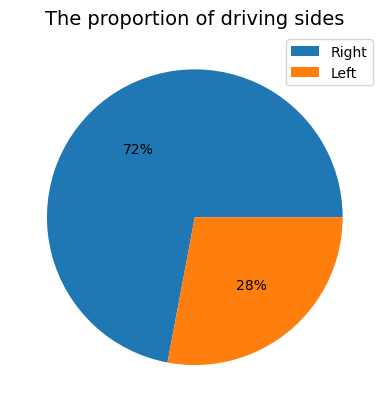

In [44]:
# Visualization

driving_sides = countries['car_side'].value_counts()
plt.pie(driving_sides, autopct='%.0f%%')
plt.title('The proportion of driving sides', fontsize=14)
plt.legend(labels=driving_sides.index.str.title())
plt.show()

#### 8. What are the countries driving on the left side?

In [91]:
left_car_side = countries[countries['car_side'] == 'left']
left_car_side.head()

,name,code,continent,area,car_side,population,gini,languages,capital,currency
0,Grenada,GRD,North America,344.0,left,112519,NaN,English,St. George's,XCD
5,Barbados,BRB,North America,430.0,left,287371,NaN,English,Bridgetown,BBD
10,Indonesia,IDN,Asia,1904569.0,left,273523621,38.2,Indonesian,Jakarta,IDR
12,Uganda,UGA,Africa,241550.0,left,45741000,42.8,"English, Swahili",Kampala,UGX
15,South Africa,ZAF,Africa,1221037.0,left,59308690,63.0,"Afrikaans, English, Southern Ndebele, Northern...",Pretoria,ZAR


In [89]:
nb_left_side, nb_columns = left_car_side.shape

In [93]:
left_side_english = left_car_side[left_car_side['languages'].str.contains('English')]
left_side_english.head()

,name,code,continent,area,car_side,population,gini,languages,capital,currency
0,Grenada,GRD,North America,344.0,left,112519,NaN,English,St. George's,XCD
5,Barbados,BRB,North America,430.0,left,287371,NaN,English,Bridgetown,BBD
12,Uganda,UGA,Africa,241550.0,left,45741000,42.8,"English, Swahili",Kampala,UGX
15,South Africa,ZAF,Africa,1221037.0,left,59308690,63.0,"Afrikaans, English, Southern Ndebele, Northern...",Pretoria,ZAR
22,Solomon Islands,SLB,Oceania,28896.0,left,686878,37.1,English,Honiara,SBD


In [97]:
nb_left_side_english, columns = left_side_english.shape

In [95]:
pct_left_english = nb_left_side_english / nb_left_side
print("There are {} countries that use left-hand traffic and {:.2%} of them speak English, which makes sense since many of those countries were part of the British Empire.".format(nb_left_side, pct_left_english))

There are 52 countries that use left-hand traffic and 76.92% of them speak English, which makes sense since many of those countries were part of the British Empire.
